<a href="https://colab.research.google.com/github/Angie1996-hue/Python_py/blob/main/timeSeriesAutoCorr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **<span style="color:blue;">Training for Engineers</span>**

In [ ]:
print("Welcome to this training for Engineers")

Welcome to this training for Engineers


In [2]:
import pandas as pd
import statsmodels as sm
from matplotlib import pyplot as plt
import numpy as np

In [3]:
import kagglehub
# Download latest version

path=kagglehub.dataset_download("joebeachcapital/nsw-australia-electricity-demand-2018-2023")

100%|██████████| 2.23M/2.23M [00:00<00:00, 130MB/s]

Extracting files...


In [4]:
import os
s=os.listdir(path)
print(s)

['PRICE_AND_DEMAND_202103_NSW1.csv', 'PRICE_AND_DEMAND_201903_NSW1.csv', 'PRICE_AND_DEMAND_202104_NSW1.csv', 'PRICE_AND_DEMAND_202201_NSW1.csv', 'PRICE_AND_DEMAND_201803_NSW1.csv', 'PRICE_AND_DEMAND_201809_NSW1.csv', 'PRICE_AND_DEMAND_202211_NSW1.csv', 'PRICE_AND_DEMAND_202301_NSW1.csv', 'PRICE_AND_DEMAND_202212_NSW1.csv', 'PRICE_AND_DEMAND_202105_NSW1.csv', 'PRICE_AND_DEMAND_202112_NSW1.csv', 'PRICE_AND_DEMAND_201802_NSW1.csv', 'PRICE_AND_DEMAND_202210_NSW1.csv', 'PRICE_AND_DEMAND_201909_NSW1.csv', 'PRICE_AND_DEMAND_201807_NSW1.csv', 'PRICE_AND_DEMAND_201811_NSW1.csv', 'PRICE_AND_DEMAND_201912_NSW1.csv', 'PRICE_AND_DEMAND_201904_NSW1.csv', 'PRICE_AND_DEMAND_202010_NSW1.csv', 'PRICE_AND_DEMAND_202205_NSW1.csv', 'PRICE_AND_DEMAND_202207_NSW1.csv', 'PRICE_AND_DEMAND_201905_NSW1.csv', 'PRICE_AND_DEMAND_202008_NSW1.csv', 'PRICE_AND_DEMAND_201808_NSW1.csv', 'PRICE_AND_DEMAND_201907_NSW1.csv', 'PRICE_AND_DEMAND_202002_NSW1.csv', 'PRICE_AND_DEMAND_202001_NSW1.csv', 'PRICE_AND_DEMAND_202102_NS

In [5]:
path=path+"/"+s[0]

In [6]:
 def truncateDateToHour(dt):
  return dt.replace(minute=0, second=0, microsecond=0)

In [7]:
import pandas as pd
data = pd.read_csv(path, usecols=['SETTLEMENTDATE', 'TOTALDEMAND'], parse_dates=['SETTLEMENTDATE'])
data["Timestamp"]=data["SETTLEMENTDATE"].apply( truncateDateToHour)
data.drop('SETTLEMENTDATE', axis=1, inplace=True)
data.rename(columns={'TOTALDEMAND': 'Energy_Demand'}, inplace=True)
data.head()


,Energy_Demand,Timestamp
0,6947.85,2021-03-01 00:00:00
1,6769.28,2021-03-01 01:00:00
2,6499.29,2021-03-01 01:00:00
3,6336.15,2021-03-01 02:00:00
4,6243.42,2021-03-01 02:00:00


In [8]:
df=data.groupby("Timestamp")["Energy_Demand"].mean()


In [9]:
df=pd.DataFrame(df)
df.sort_index(inplace=True)
df.head()

,Energy_Demand
Timestamp,
2021-03-01 00:00:00,6947.850
2021-03-01 01:00:00,6634.285
2021-03-01 02:00:00,6289.785
2021-03-01 03:00:00,6218.445
2021-03-01 04:00:00,6417.355


<Axes: title={'center': 'Daily Energy Consumption'}, xlabel='Timestamp'>

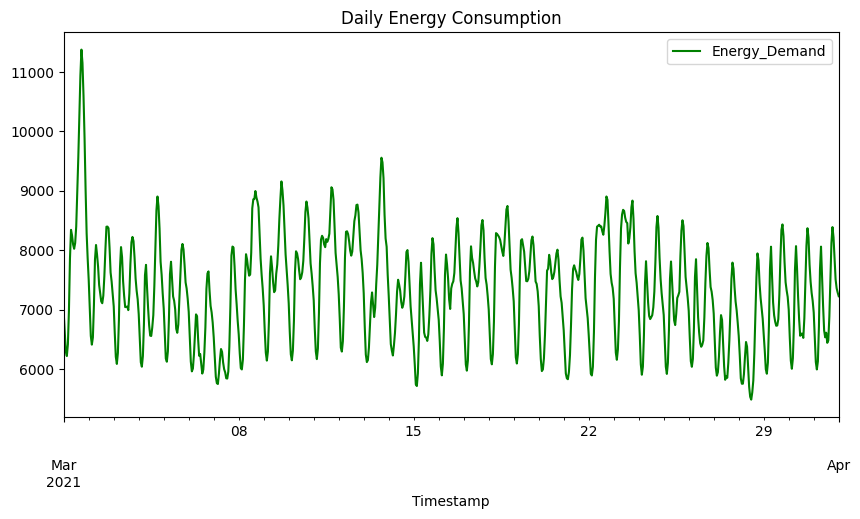

In [10]:
df.plot (y="Energy_Demand", title='Daily Energy Consumption', figsize=(10, 5), color='g')

In [ ]:
#checking stationarity
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['Energy_Demand'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

if result[1] > 0.05:
    print("Data is non-stationary, differencing is needed.")
else:
    print("Data is stationary.")

ADF Statistic: -3.023831896248416
p-value: 0.03272794713192721
Data is stationary.


In [ ]:
#differencing - removes stationarity
dataDiff = df.diff().dropna()

<Axes: title={'center': 'Daily Energy Consumption'}, xlabel='Timestamp'>

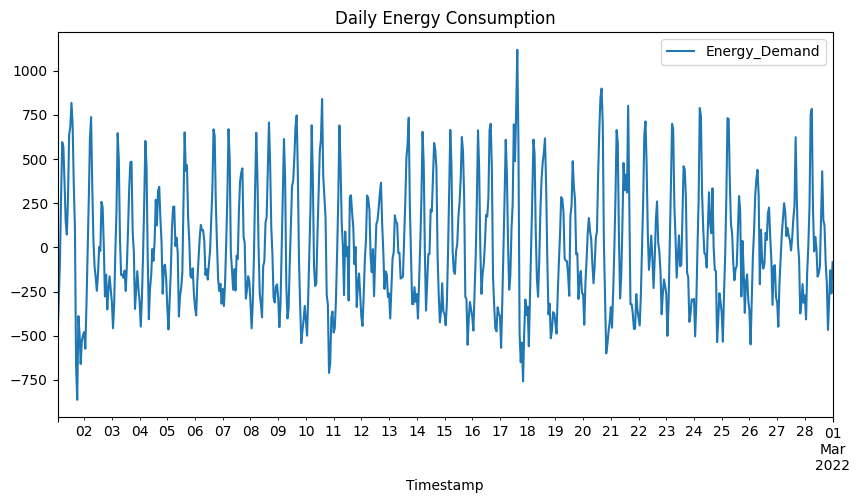

In [ ]:
dataDiff.plot (y="Energy_Demand", title='Daily Energy Consumption', figsize=(10, 5))

In [ ]:
dataDiff.head()

,Energy_Demand
Timestamp,
2022-02-01 01:00:00,-498.923409
2022-02-01 02:00:00,-306.840000
2022-02-01 03:00:00,-88.000000
2022-02-01 04:00:00,282.965000
2022-02-01 05:00:00,596.155000


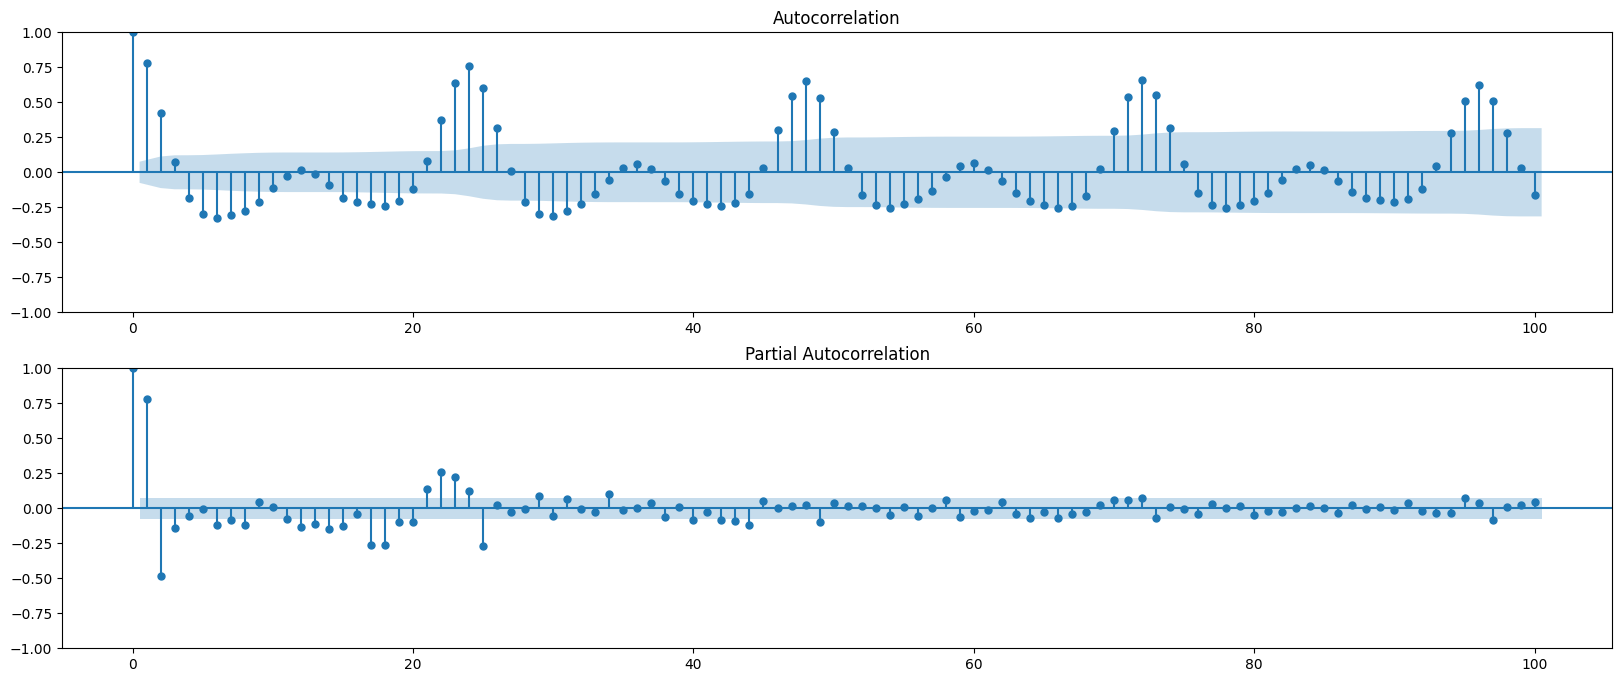

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 1, figsize=(20, 8))
plot_acf(dataDiff, lags=100, ax=ax[0])
plot_pacf(dataDiff, lags=100, ax=ax[1])
plt.show()

In [ ]:
#Building the AR Model
from statsmodels.tsa.ar_model import AutoReg
p=2
trainEnd=int(0.8*len(dataDiff))
model = AutoReg(dataDiff[0:trainEnd], lags=p)
fittedModel = model.fit()
# Summary of the model
print(fittedModel.summary())

                            AutoReg Model Results                             
Dep. Variable:          Energy_Demand   No. Observations:                  537
Model:                     AutoReg(2)   Log Likelihood               -3551.244
Method:               Conditional MLE   S.D. of innovations            184.731
Date:                Thu, 13 Mar 2025   AIC                           7110.488
Time:                        11:54:44   BIC                           7127.618
Sample:                    02-01-2022   HQIC                          7117.190
                         - 02-23-2022                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3993      7.987      0.050      0.960     -15.255      16.053
Energy_Demand.L1     1.1981      0.037     32.383      0.000       1.126       1.271
Energy_Demand.L2    -0.5180 

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


In [ ]:
#Predict
predicted = fittedModel.predict(start=trainEnd, end=len(dataDiff))
len(predicted)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


136

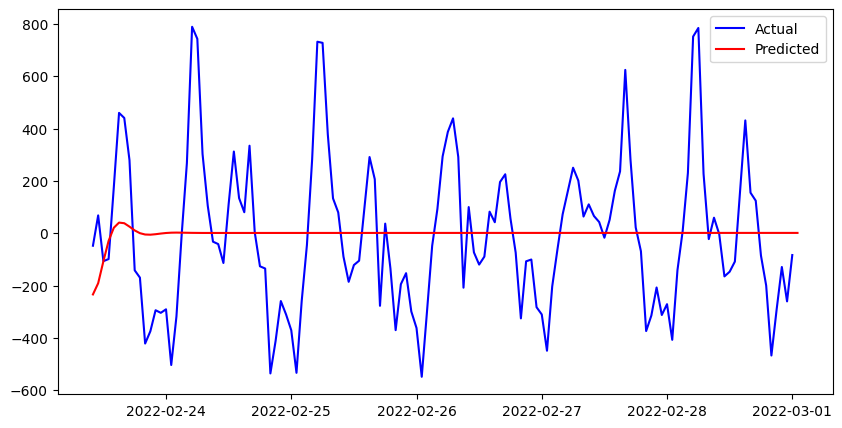

In [ ]:
plt.rcParams["figure.figsize"] = (10, 5)
plt.plot(dataDiff['Energy_Demand'][trainEnd:], color='b', label='Actual')
plt.plot(predicted, color='r', label='Predicted')
plt.legend()
#plt.show()
plt.rcParams['figure.figsize'] = plt.rcParamsDefault['figure.figsize']

In [ ]:
#recover original values
lastOriginal=df['Energy_Demand'][trainEnd-1]
print(lastOriginal)
tempA=np.insert(predicted.values, 0, lastOriginal)
predictedOriginal=np.cumsum(tempA)
predictedOriginal=predictedOriginal[1:-1]
#

8337.114166666666


<ipython-input-68-6362271dcf89>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  lastOriginal=df['Energy_Demand'][trainEnd-1]


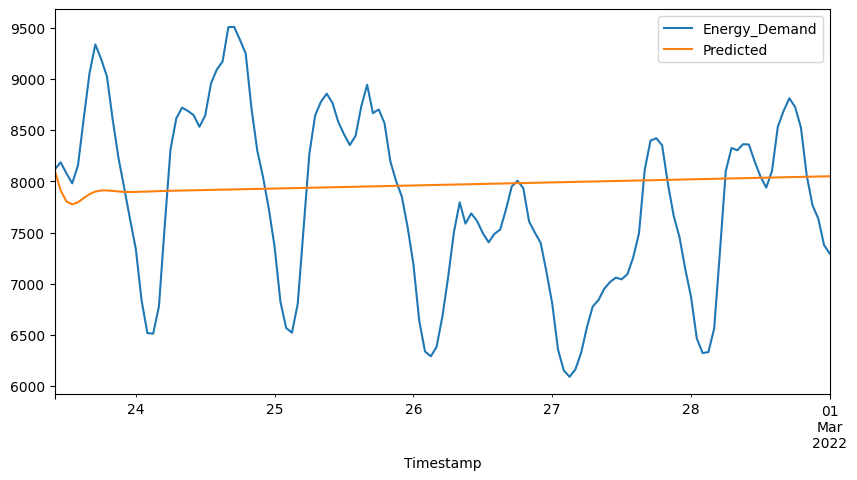

In [ ]:
#Graph the predictions and the originals
plt.rcParams["figure.figsize"] = (10, 5)
start=trainEnd+1
df1=pd.DataFrame({"Energy_Demand":df['Energy_Demand'][start:], "Predicted":predictedOriginal})
df1.plot()
plt.legend()
plt.show()
plt.rcParams['figure.figsize'] = plt.rcParamsDefault['figure.figsize']


In [ ]:
df1.head(10)

,Energy_Demand,Predicted
Timestamp,,
2022-02-23 10:00:00,8117.930833,8103.218021
2022-02-23 11:00:00,8186.081667,7912.191154
2022-02-23 12:00:00,8079.335000,7804.884038
2022-02-23 13:00:00,7980.660000,7775.672514
2022-02-23 14:00:00,8157.123333,7796.658439
2022-02-23 15:00:00,8617.072500,7837.331381
2022-02-23 16:00:00,9057.643333,7875.588892
2022-02-23 17:00:00,9337.099167,7900.754926
2022-02-23 18:00:00,9195.395000,7911.487739


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
#Build the ARIMA model
p=1
d=0
q=3
trainEnd=int(0.8*len(df))
df.freq="h"
model = ARIMA(df["Energy_Demand"][:trainEnd], order=(p, d, q))
fittedModel = model.fit()
# Summary of the model
print(fittedModel.summary())

                                     SARIMAX Results                                      
Dep. Variable:                      Energy_Demand   No. Observations:                  538
Model:             SARIMAX(5, 1, 2)x(2, 1, 2, 24)   Log Likelihood               -3231.896
Date:                            Thu, 13 Mar 2025   AIC                           6487.791
Time:                                    15:25:25   BIC                           6538.674
Sample:                                02-01-2022   HQIC                          6507.736
                                     - 02-23-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          2.6221      0.074     35.307      0.000       2.477       2.768
ar.L2         -2.4848      0.146   

In [ ]:
#Predict
# steps=len(df)-trainEnd
# predicted = fittedModel.forecast(steps=steps)
# print(predicted[0:30])

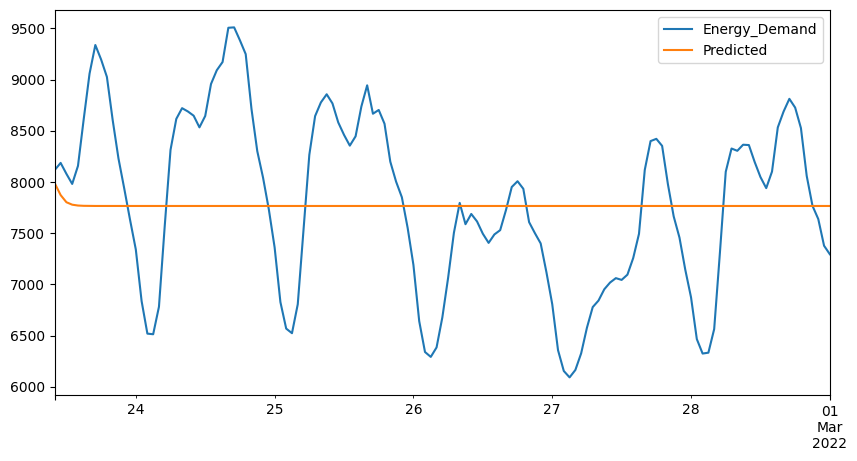

In [ ]:
#Graph the predictions and the originals
plt.rcParams["figure.figsize"] = (10, 5)
start=trainEnd
df1=pd.DataFrame({"Energy_Demand":df['Energy_Demand'][start:].values, "Predicted":predicted})

df1.plot()
plt.legend()
plt.show()
plt.rcParams['figure.figsize'] = plt.rcParamsDefault['figure.figsize']

In [ ]:
#SARIMA Model - used when the data has seasonality
def pltAcfPacfTrend(data, lag):
    fig, ax = plt.subplots(3, 1, figsize=(20, 8))
    ax[0].plot(data)
    ax[0].set_title('Trend')
    plot_acf(df, lags=lag, ax=ax[1])
    plot_pacf(df, lags=lag, ax=ax[2])
    plt.show()


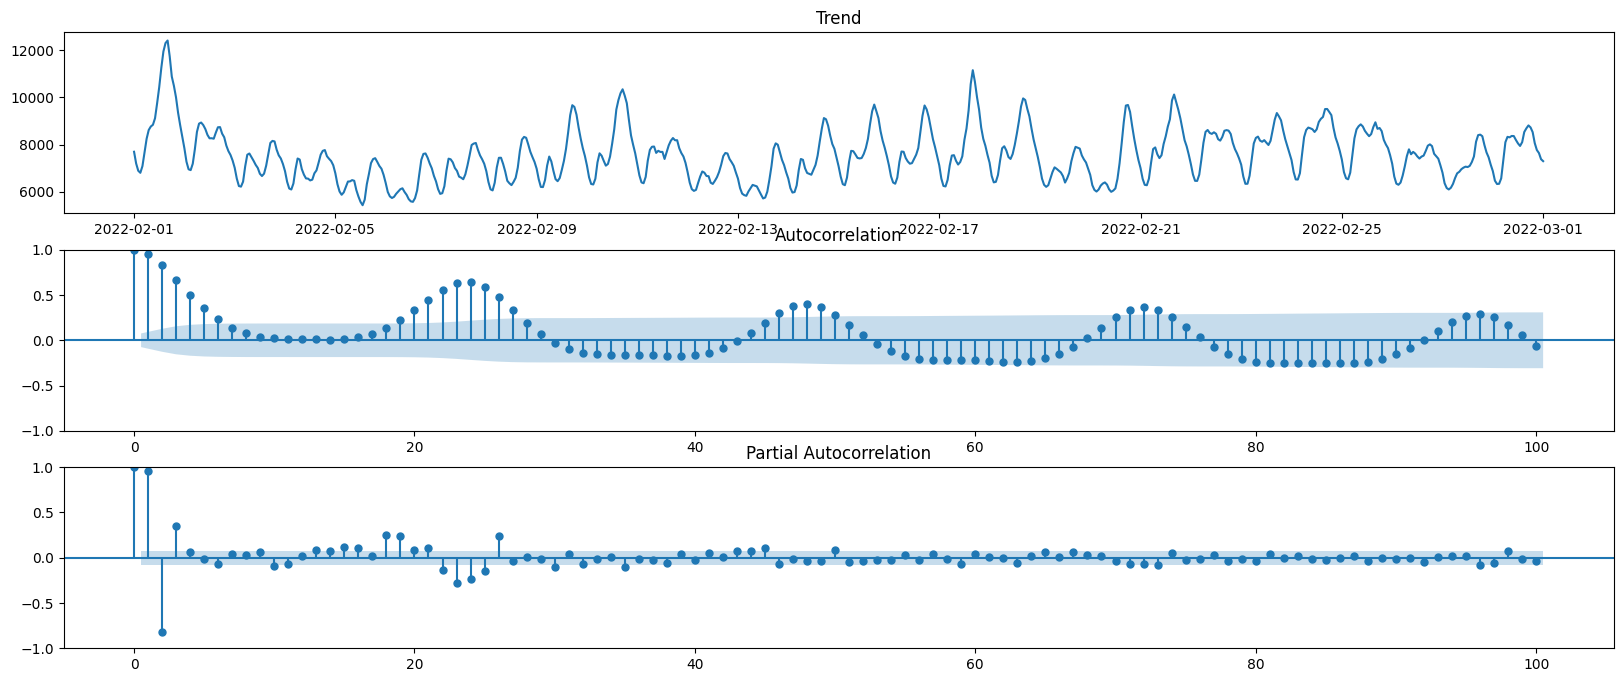

In [ ]:
#Apply differencing to remove the seasonality
pltAcfPacfTrend(df, 100)

In [ ]:
#Apply differencing to remove the seasonality
# dataDiff = df.diff(48)
# dataDiff.dropna(inplace=True)
# pltAcfPacfTrend(dataDiff, 100)

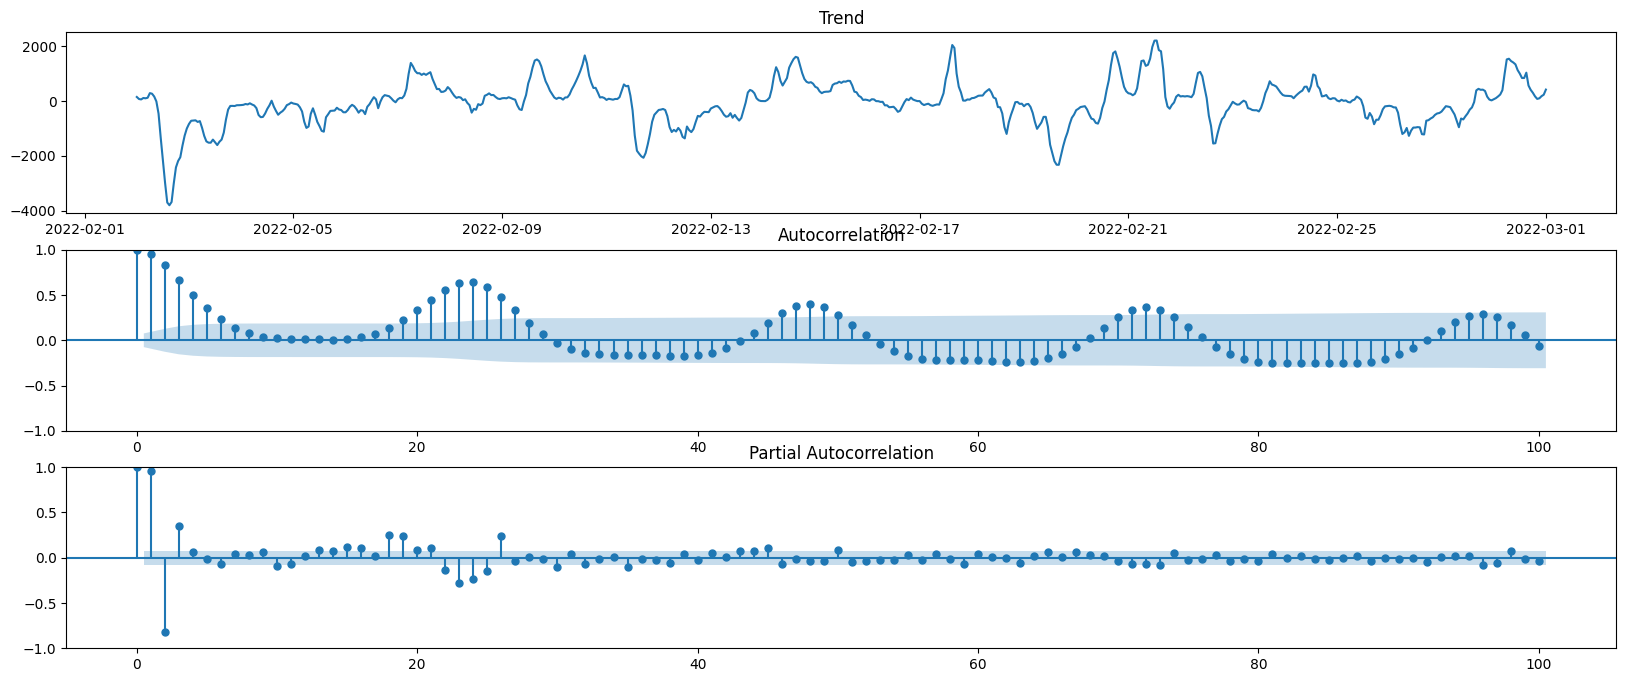

In [ ]:
#Apply differencing to remove the seasonality
dataDiff = df.diff(24)
dataDiff.dropna(inplace=True)
pltAcfPacfTrend(dataDiff, 100)


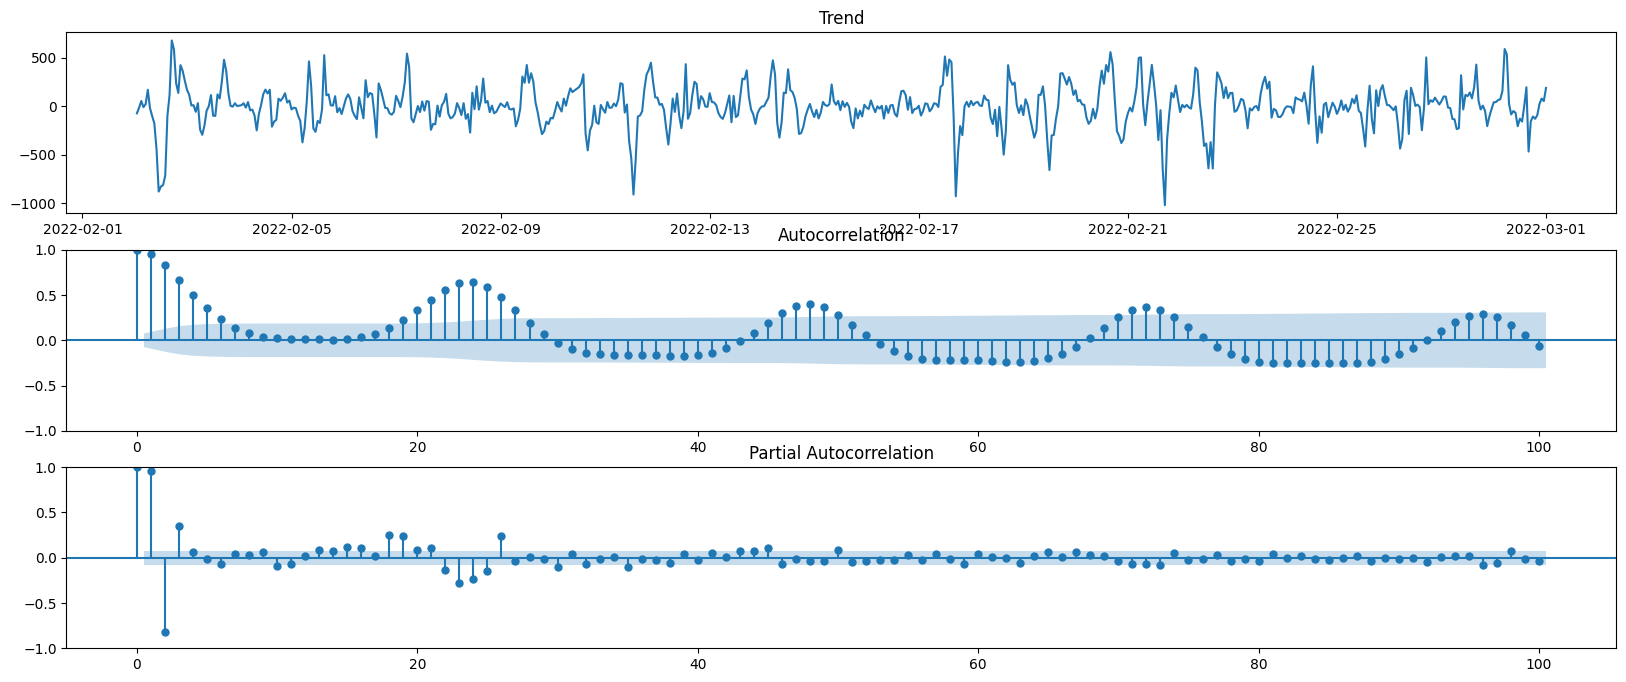

In [ ]:

#Apply differencing to reduce the number of significant correlations in the ac curve
dataDiff = dataDiff.diff(1)
dataDiff.dropna(inplace=True)
pltAcfPacfTrend(dataDiff, 100)

In [ ]:
#try a SARIMA model
from statsmodels.tsa.statespace.sarimax import SARIMAX
p=5
d=1
q=2
P=2
D=1
Q=2
S=24
trainEnd=int(0.8*len(df))
model = SARIMAX(df["Energy_Demand"][:trainEnd], order=(p, d, q), seasonal_order=(P, D, Q, S))
fittedModel = model.fit()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
steps=len(df)-trainEnd
#predictions=model.get_forecast(steps=steps)
predictions=fittedModel.forecast(steps=steps)


In [ ]:
fittedModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                      Energy_Demand   No. Observations:                  538
Model:             SARIMAX(5, 1, 2)x(2, 1, 2, 24)   Log Likelihood               -3231.896
Date:                            Thu, 13 Mar 2025   AIC                           6487.791
Time:                                    15:14:58   BIC                           6538.674
Sample:                                02-01-2022   HQIC                          6507.736
                                     - 02-23-2022                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          2.6221      0.074     35.307      0.000       2.477       2.768
ar.L2         -2.4848      0.146    -17.061      0.000      -2.770      -2.199
ar.L3          0.9124      0.125      7.296      0.000       0.667       1.158
ar.L4         -0.0317      0.080     -0.398      0.691      -0.188       0.125
ar.L5         -0.0486      0.029     -1.652      0.099      -0.106       0.009
ma.L1         -1.8516      0.063    -29.579      0.000      -1.974      -1.729
ma.L2          0.8923      0.058     15.339      0.000       0.778       1.006
ar.S.L24       1.1858      0.098     12.043      0.000       0.993       1.379
ar.S.L48      -0.2118      0.038     -5.608      0.000      -0.286      -0.138
ma.S.L24      -1.9548      0.241     -8.128      0.000      -2.426      -1.483
ma.S.L48       0.9596      0.230      4.165      0.000       0.508       1.411
sigma2      1.478e+04   2011.016      7.349      0.000    1.08e+04    1.87e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):               196.04
Prob(Q):                              0.87   Prob(JB):                         0.00
Heteroskedasticity (H):               1.21   Skew:                            -0.50
Prob(H) (two-sided):                  0.21   Kurtosis:                         5.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

135
135


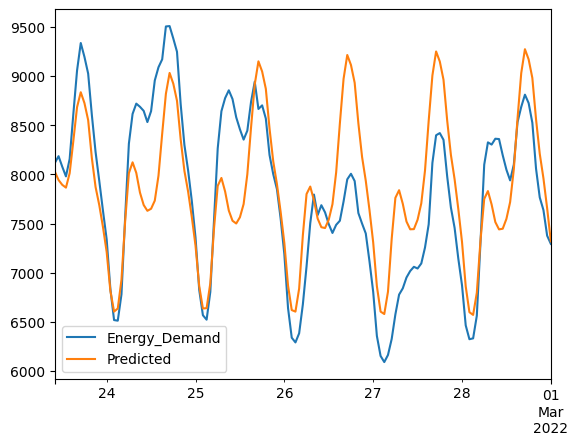

In [ ]:
print(len(predictions))
print(len(df["Energy_Demand"][trainEnd:]))

df2=pd.DataFrame({"Energy_Demand":df["Energy_Demand"][trainEnd:].values, "Predicted":predictions})
df2.plot()
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(df2["Energy_Demand"], df2["Predicted"])
rmse = np.sqrt(mean_squared_error(df2["Energy_Demand"],df2["Predicted"]))

print(f'MAE: {mae:.2f}')
print(f'RMSE: {rmse:.2f}')

MAE: 479.21
RMSE: 582.87
